<a href="https://colab.research.google.com/github/CarlosNeto2804/imersao-dados-2/blob/main/imersao_dados_aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

In [239]:
import pandas as pd;

dados_enem = pd.read_csv('https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true')

# retorna as 5 primeiras linhas da colecao
dados_enem.head() 

# para acessar apenas uma coluna -> dados_enem['nome_da_coluna']
dados_enem['SG_UF_RESIDENCIA']

# para verificar quais colunas existem no data frame -> dados_enem.colums.values
dados_enem.columns.values

# acessar mais de um valor no DataFrame data_frame[["cabeçalho1","cabeçalho2"]]
dados_enem[["SG_UF_RESIDENCIA","Q025"]]

# retornar os valores sem repeticao de uma coluna
dados_enem["SG_UF_RESIDENCIA"].unique() 

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [240]:
# soma dos elementos de uma derminada chave
# ordena pelo valor
#ESTADOS
dados_enem["SG_UF_RESIDENCIA"].value_counts()

#IDADES
dados_enem['NU_IDADE'].value_counts()

# ordenacao pelo index
dados_enem['NU_IDADE'].value_counts().sort_index()
dados_enem['NU_IDADE'].describe()


count    127380.000000
mean         22.094355
std           7.498707
min          13.000000
25%          18.000000
50%          19.000000
75%          24.000000
max          82.000000
Name: NU_IDADE, dtype: float64

# Continuação

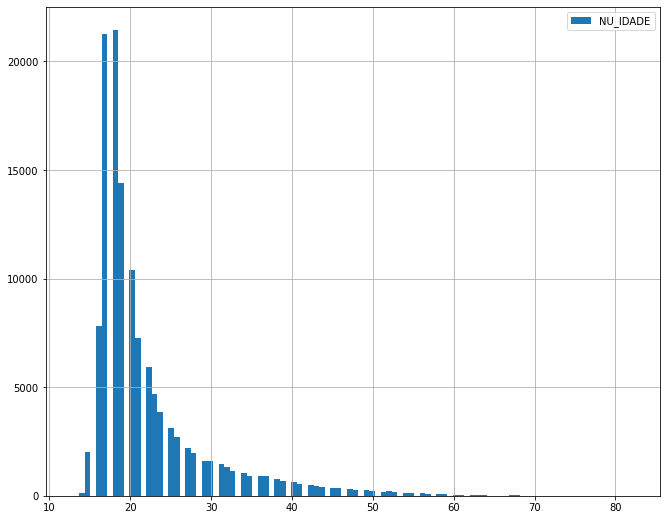

In [241]:
# visualização em histograma
#dados_enem['NU_IDADE'].hist()
dados_enem['NU_IDADE'].hist(bins=100,figsize=(11,9),legend=True)

In [242]:
treineiros = dados_enem.query('IN_TREINEIRO == 1')
treineiros['NU_IDADE'].value_counts()

16    7142
17    4901
15    1927
18     858
19     228
20      83
14      64
21      44
22      30
23      21
24      13
26      13
29      10
27       9
25       8
28       6
38       4
40       4
31       4
30       4
42       4
34       3
36       2
39       2
32       2
46       2
44       2
35       2
45       1
41       1
33       1
62       1
48       1
51       1
37       1
47       1
55       1
Name: NU_IDADE, dtype: int64

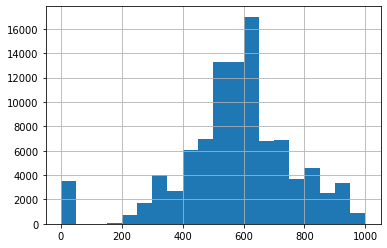

In [243]:
# Notas Redacao
dados_enem['NU_NOTA_REDACAO'].hist(bins=20)

In [244]:
# analise geral
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados_enem[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


# Desafios


- 01 : Informar a proporção de inscritos por idades

In [245]:
# desafio 1
def proporcao(total_itens):
    def funcao_calculo(x): 
      res = x * 100 /  total_itens
      return round(res, 6);
    return funcao_calculo

total = len(dados_enem)
inscritos_por_idade = dados_enem['NU_IDADE'].value_counts()
inscritos_por_idade.apply(proporcao(total))

18    16.840948
17    16.687078
19    11.318888
20     8.174753
16     6.146962
        ...    
75     0.001570
73     0.001570
82     0.000785
77     0.000785
76     0.000785
Name: NU_IDADE, Length: 65, dtype: float64

- 02: Descobrir de quais estados são os inscritos com 13 anos

In [246]:
# desafio 02
cabecalhos= ['SG_UF_RESIDENCIA','NU_IDADE']
inscritos=dados_enem[cabecalhos]
inscritos.query('NU_IDADE==13')


,SG_UF_RESIDENCIA,NU_IDADE
57359,SP,13
95630,MT,13
98197,AP,13
116501,BA,13


- 03: Qual a proporcao dos alunos com 18 anos por estado

In [247]:
# desafio 3
cabecalhos = ['SG_UF_RESIDENCIA','NU_IDADE']
novo_df = dados_enem[cabecalhos]
inscritos = novo_df.query('NU_IDADE==18')
total_inscritos = len(inscritos)
inscritos.value_counts().apply(proporcao(total_inscritos))


SG_UF_RESIDENCIA  NU_IDADE
SP                18          16.744360
MG                18          11.047921
CE                18           7.281372
RJ                18           7.234757
BA                18           6.927093
PE                18           5.216297
RS                18           4.973895
PR                18           4.377214
MA                18           4.153459
PA                18           4.125489
GO                18           3.724594
SC                18           3.253776
PB                18           2.302816
PI                18           2.195599
ES                18           1.957859
AM                18           1.948536
RN                18           1.892597
DF                18           1.813351
MT                18           1.706135
AL                18           1.622226
MS                18           1.258624
SE                18           1.062838
TO                18           0.918329
RO                18           0.825098
AP           

- 04: Plotar Histogramas das idades de treineiros e não treineiros

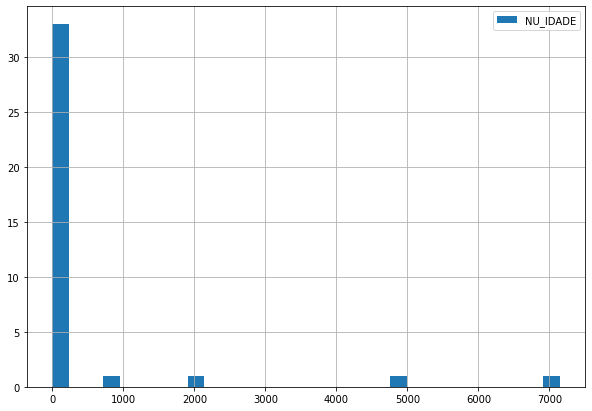

In [248]:
# desafio 4
inscritos_treineiros = dados_enem.query('IN_TREINEIRO == 1')['NU_IDADE'].value_counts();
inscritos_treineiros.hist(bins=30,figsize=(10,7),legend=True)

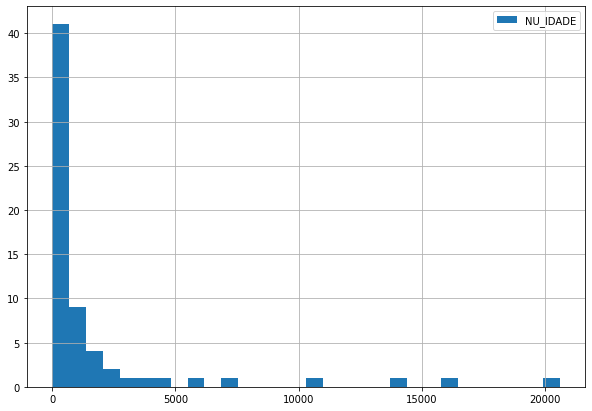

In [249]:
inscritos_nao_treineiros = dados_enem.query('IN_TREINEIRO == 0')['NU_IDADE'].value_counts();
inscritos_nao_treineiros.hist(bins=30,figsize=(10,7),legend=True)

- 05: Comparar as distribuições das provas em ingles e espanhol

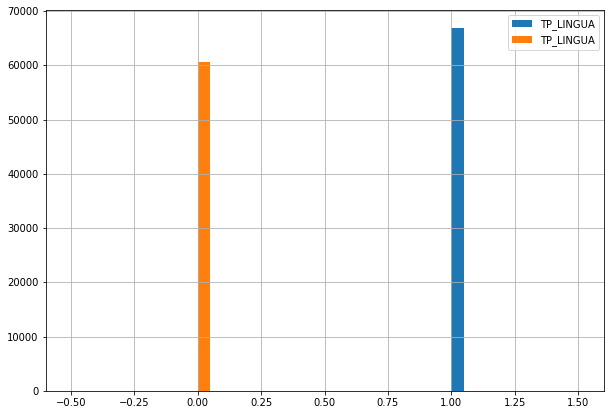

In [250]:
# desafio 5
# TP_LINGUA==0 -> Ingles
# TP_LINGUA==1 -> Espanhol
dados_enem.query('TP_LINGUA==1')['TP_LINGUA'].hist(bins=20,figsize=(10,7),legend=True)
dados_enem.query('TP_LINGUA==0')['TP_LINGUA'].hist(bins=20,figsize=(10,7),legend=True)